# Covid
https://www.kaggle.com/c/covid19-global-forecasting-week-5/data?select=train.csv

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
data.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


In [4]:
data.shape

(796490, 9)

In [5]:
data.columns

Index(['Id', 'County', 'Province_State', 'Country_Region', 'Population',
       'Weight', 'Date', 'Target', 'TargetValue'],
      dtype='object')

In [6]:
countries = data["Country_Region"].unique()
targets = data["Target"].unique()

In [7]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [210]:
countries_dict = {"Italy":{
                      "mean_age":45.5,
                      "GDP":1988636},
                  "Brazil":{
                      "mean_age":32.6,
                      "GDP":1847020},
                  "US":{
                      "mean_age":38.1,
                      "GDP":21439453},
                  "United Kingdom":{
                      "mean_age":40.5,
                      "GDP":2743586},
                  "Portugal":{
                      "mean_age":42.2,
                      "GDP":236408},
                  "Canada":{
                      "mean_age":42.2,
                      "GDP":1730914},
                  "Austria":{
                      "mean_age":44.0,
                      "GDP":447718},
                  "Belgium":{
                      "mean_age":41.4,
                      "GDP":517609},
                  "Germany":{
                      "mean_age":47.1,
                      "GDP":3863344},
                  "Greece":{
                      "mean_age":44.5,
                      "GDP":214012},
                  "Finland":{
                      "mean_age":42.5,
                      "GDP":269654}, 
                  "France":{
                      "mean_age":41.4,
                      "GDP":2707074},
                  "Netherlands":{
                      "mean_age":42.6,
                      "GDP":902355},
                  "Russia":{
                      "mean_age":39.6,
                      "GDP":1637892},
                  "Poland":{
                      "mean_age":40.7,
                      "GDP":565854},
                  "Sweden":{
                      "mean_age":41.2,
                      "GDP":528929},
                  "Spain":{
                      "mean_age":42.7,
                      "GDP":1397870},
                  "Japan":{
                      "mean_age":47.3,
                      "GDP":5154475},
                  "Korea, South":{
                      "mean_age":41.8,
                      "GDP":1629532}
                }

In [211]:
data['Date'] =  pd.to_datetime(data['Date'], format='%Y-%m-%d')
data = data[(data["County"].isnull()) & (data["Province_State"].isnull())] 

In [212]:
def create_dataframe_country_target(data, country, target, countries_dict):
    df_country = data[(data.Country_Region == country) & (data.Target == target)]
    df_country = df_country.groupby(["Country_Region","Target","Date"]).agg({"Population":"max",
                                                            "TargetValue":"sum"
                                                           })
    df_country = df_country.reset_index().set_index("Date",drop=True)
    df_country["mean_age"] = countries_dict[country]["mean_age"]
    df_country["GDP"] = countries_dict[country]["GDP"]
    df_country["Rate_over_population"] =  df_country["TargetValue"]*100000/df_country["Population"]
    return df_country

In [213]:
df_country = data[(data.Country_Region == "US") & (data.Target == "Fatalities")]

df_country.groupby(["Country_Region","Target","Date"]).agg({"Population":"max",
                                                            "TargetValue":"sum"
                                                           })

Population  TargetValue
Country_Region Target     Date                               
US             Fatalities 2020-01-23   324141489          0.0
                          2020-01-24   324141489          0.0
                          2020-01-25   324141489          0.0
                          2020-01-26   324141489          0.0
                          2020-01-27   324141489          0.0
...                                          ...          ...
                          2020-05-12   324141489       1694.0
                          2020-05-13   324141489       1743.0
                          2020-05-14   324141489       1779.0
                          2020-05-15   324141489       1632.0
                          2020-05-16   324141489       1224.0

[115 rows x 2 columns]

In [214]:
df_country

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
790971,962922,NaN,NaN,US,324141489,0.51029,2020-01-23,Fatalities,0.0
790973,962924,NaN,NaN,US,324141489,0.51029,2020-01-24,Fatalities,0.0
790975,962926,NaN,NaN,US,324141489,0.51029,2020-01-25,Fatalities,0.0
790977,962928,NaN,NaN,US,324141489,0.51029,2020-01-26,Fatalities,0.0
790979,962930,NaN,NaN,US,324141489,0.51029,2020-01-27,Fatalities,0.0
...,...,...,...,...,...,...,...,...,...
791191,963142,NaN,NaN,US,324141489,0.51029,2020-05-12,Fatalities,1694.0
791193,963144,NaN,NaN,US,324141489,0.51029,2020-05-13,Fatalities,1743.0
791195,963146,NaN,NaN,US,324141489,0.51029,2020-05-14,Fatalities,1779.0
791197,963148,NaN,NaN,US,324141489,0.51029,2020-05-15,Fatalities,1632.0


In [215]:
df_Italy = create_dataframe_country_target(data, "Italy", "Fatalities",countries_dict)
df_Brazil = create_dataframe_country_target(data, "Brazil", "Fatalities",countries_dict)
df_US = create_dataframe_country_target(data, "US", "Fatalities",countries_dict)

In [216]:
df_US

,Country_Region,Target,Population,TargetValue,mean_age,GDP,Rate_over_population
Date,,,,,,,
2020-01-23,US,Fatalities,324141489,0.0,38.1,21439453,0.000000
2020-01-24,US,Fatalities,324141489,0.0,38.1,21439453,0.000000
2020-01-25,US,Fatalities,324141489,0.0,38.1,21439453,0.000000
2020-01-26,US,Fatalities,324141489,0.0,38.1,21439453,0.000000
2020-01-27,US,Fatalities,324141489,0.0,38.1,21439453,0.000000
...,...,...,...,...,...,...,...
2020-05-12,US,Fatalities,324141489,1694.0,38.1,21439453,0.522611
2020-05-13,US,Fatalities,324141489,1743.0,38.1,21439453,0.537728
2020-05-14,US,Fatalities,324141489,1779.0,38.1,21439453,0.548834


In [217]:
df_Brazil

,Country_Region,Target,Population,TargetValue,mean_age,GDP,Rate_over_population
Date,,,,,,,
2020-01-23,Brazil,Fatalities,206135893,0.0,32.6,1847020,0.000000
2020-01-24,Brazil,Fatalities,206135893,0.0,32.6,1847020,0.000000
2020-01-25,Brazil,Fatalities,206135893,0.0,32.6,1847020,0.000000
2020-01-26,Brazil,Fatalities,206135893,0.0,32.6,1847020,0.000000
2020-01-27,Brazil,Fatalities,206135893,0.0,32.6,1847020,0.000000
...,...,...,...,...,...,...,...
2020-05-12,Brazil,Fatalities,206135893,808.0,32.6,1847020,0.391974
2020-05-13,Brazil,Fatalities,206135893,779.0,32.6,1847020,0.377906
2020-05-14,Brazil,Fatalities,206135893,759.0,32.6,1847020,0.368204


In [218]:
import plotly.express as px
fig = px.line()
fig.add_scatter(x=df_Brazil.reset_index()['Date'], 
                y=df_Brazil.reset_index()['TargetValue'],
                mode='lines',   name="Brazil")
fig.add_scatter(x=df_Italy.reset_index()['Date'], 
                y=df_Italy.reset_index()['TargetValue'],
                mode='lines',   name="Brazil")
fig.add_scatter(x=df_US.reset_index()['Date'], 
                y=df_US.reset_index()['TargetValue'],
                mode='lines',   name="US")

fig.show()

In [219]:
import plotly.express as px
fig = px.line()
fig.add_scatter(x=df_Brazil.reset_index()['Date'], 
                y=df_Brazil.reset_index()['Rate_over_population'],
                mode='lines',   name="Brazil")
fig.add_scatter(x=df_Italy.reset_index()['Date'], 
                y=df_Italy.reset_index()['Rate_over_population'],
                mode='lines',   name="Brazil")
fig.add_scatter(x=df_US.reset_index()['Date'], 
                y=df_US.reset_index()['Rate_over_population'],
                mode='lines',   name="US")
fig.show()

In [220]:
import numpy as np


In [221]:
def create_training_df(df_country,n_days=5,target="TargetValue",population=True,mean_age=True,gdp=True):
    df_country = df_country.sort_index().reset_index(drop=True)
    columns = ["Target"]+list(np.arange(0,n_days,1))
    df_train = pd.DataFrame(columns=columns)
    j=0    
    for i in range(n_days,df_country.shape[0]):
        df_train = df_train.append({'Target': df_country.loc[i,target]}, ignore_index=True)
        for day in range(n_days):
            df_train.loc[j,day] = df_country.loc[i-n_days+day,target]
        j=j+1    
    if population:
        df_train["Population"] = df_country["Population"].max()
    if mean_age:
        df_train["mean_age"] = df_country["mean_age"].max()
    if gdp:
        df_train["GDP"] = df_country["GDP"].max()
    return df_train

In [222]:
#create_dataframe_country_target(data, "Italy", "Fatalities",countries_dict)
#countries_to_train = list(countries_dict.keys())
countries_to_train = ["Portugal"]
#countries_to_train.remove("Brazil")
print(countries_to_train)
target = "Fatalities"
df_train = create_training_df(create_dataframe_country_target(data, countries_to_train[0], target,countries_dict),target="Rate_over_population")
for i in range(1, len(countries_to_train)):
    df_train = pd.concat([df_train,
                         create_training_df(create_dataframe_country_target(data, 
                                                                            countries_to_train[i], 
                                                                            target,
                                                                            countries_dict),
                                            target="Rate_over_population")])


['Portugal']


In [223]:
df_train["GDP"].unique()

array([236408])

In [224]:
param_grid = { 
    'n_estimators': [100],
    'max_depth' : [2,3,4,5,6,7,8],
    'min_samples_leaf':[3,5]
}

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
regr = RandomForestRegressor(random_state=0)

CV_regr = GridSearchCV(estimator=regr, param_grid=param_grid, cv= 5)
CV_regr.fit(df_train.drop("Target",axis=1), df_train["Target"])


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [173]:
df_Brazil_test = create_training_df(create_dataframe_country_target(data, "Brazil", target,countries_dict),target="Rate_over_population")

In [174]:
df_Brazil_test.tail()

,Target,0,1,2,3,4,Population,mean_age,GDP
105,0.391974,0.292040,0.401192,0.309990,0.226550,0.257112,206135893,32.6,1847020
106,0.377906,0.401192,0.309990,0.226550,0.257112,0.391974,206135893,32.6,1847020
107,0.368204,0.309990,0.226550,0.257112,0.391974,0.377906,206135893,32.6,1847020
108,0.467168,0.226550,0.257112,0.391974,0.377906,0.368204,206135893,32.6,1847020
109,0.339582,0.257112,0.391974,0.377906,0.368204,0.467168,206135893,32.6,1847020


In [175]:
df_Brazil_test["Prediction"] = CV_regr.predict(df_Brazil_test.drop("Target",axis=1))

In [176]:
df_Brazil_test

,Target,0,1,2,3,4,Population,mean_age,GDP,Prediction
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020,0.000679
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020,0.000679
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020,0.000679
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020,0.000679
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020,0.000679
...,...,...,...,...,...,...,...,...,...,...
105,0.391974,0.292040,0.401192,0.309990,0.226550,0.257112,206135893,32.6,1847020,0.243940
106,0.377906,0.401192,0.309990,0.226550,0.257112,0.391974,206135893,32.6,1847020,0.294029
107,0.368204,0.309990,0.226550,0.257112,0.391974,0.377906,206135893,32.6,1847020,0.283443
108,0.467168,0.226550,0.257112,0.391974,0.377906,0.368204,206135893,32.6,1847020,0.282615


In [177]:
fig = px.line()
fig.add_scatter(y=df_Brazil_test['Prediction'],
                mode='lines',   name="Prediction")
fig.add_scatter(y=df_Brazil_test['Target'],
                mode='lines',   name="Target")
fig.show()

In [178]:
df_Brazil_test = create_training_df(create_dataframe_country_target(data, "Brazil", target,countries_dict),target="Rate_over_population")
cols = list(df_Brazil_test.columns)
cols.remove("Target")
cols.remove("Population")
cols.remove("mean_age")
cols.remove("GDP")
start_row = 40
row = df_Brazil_test.iloc[start_row,1:len(df_Brazil_test.columns)].to_frame().transpose()
preds = []
n_day_to_predict = 300
err_ = 0.0

In [179]:
row

,0,1,2,3,4,Population,mean_age,GDP
40,0.0,0.0,0.0,0.0,0.0,206135893.0,32.6,1847020.0


In [205]:
df_Brazil_test = create_training_df(create_dataframe_country_target(data, "Brazil", target,countries_dict),target="Rate_over_population")
cols = list(df_Brazil_test.columns)
cols.remove("Target")
cols.remove("Population")
cols.remove("mean_age")
cols.remove("GDP")
start_row = 100
row = df_Brazil_test.iloc[start_row,1:len(df_Brazil_test.columns)].to_frame().transpose()
preds = []
n_day_to_predict =100
err_ = 0.1
import random
for day in range(n_day_to_predict):
    prediction = CV_regr.predict(row)
    prediction = prediction[0]+ [-1,1][random.randrange(2)]*prediction[0]*err_
    preds.append(prediction)
    for i in range(len(cols)-1):
        row[cols[i]] =row[cols[i+1]] 
    row[len(cols)-1] = prediction     

In [206]:
real = df_Brazil_test["Target"].reset_index(False)
real.columns = ["Day","Target_real"]

In [207]:
predicted = pd.DataFrame(np.column_stack((list(np.arange(start_row,n_day_to_predict+start_row,1)),preds)),
                        columns=["Day","Target_predicted"])

In [208]:
df_comparison = pd.merge(real,predicted,on="Day",how="outer")

In [209]:
fig = px.line()
fig.add_scatter(x=df_comparison["Day"],
                y=df_comparison['Target_real'],
                mode='lines',   name="Real")
fig.add_scatter(x=df_comparison["Day"],
                y=df_comparison['Target_predicted'],
                mode='lines',   name="Predicted")
fig.show()

In [167]:
df_train[df_train["GDP"] == 21439453]

,Target,0,1,2,3,4,Population,mean_age,GDP


In [168]:
df_Brazil_test

,Target,0,1,2,3,4,Population,mean_age,GDP
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206135893,32.6,1847020
...,...,...,...,...,...,...,...,...,...
105,0.391974,0.292040,0.401192,0.309990,0.226550,0.257112,206135893,32.6,1847020
106,0.377906,0.401192,0.309990,0.226550,0.257112,0.391974,206135893,32.6,1847020
107,0.368204,0.309990,0.226550,0.257112,0.391974,0.377906,206135893,32.6,1847020
108,0.467168,0.226550,0.257112,0.391974,0.377906,0.368204,206135893,32.6,1847020


# LSTM
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [270]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [227]:
df_Italy = create_dataframe_country_target(data, "Italy", "Fatalities",countries_dict)
df_Brazil = create_dataframe_country_target(data, "Brazil", "Fatalities",countries_dict)
df_US = create_dataframe_country_target(data, "US", "Fatalities",countries_dict)

In [228]:
df_Italy

,Country_Region,Target,Population,TargetValue,mean_age,GDP,Rate_over_population
Date,,,,,,,
2020-01-23,Italy,Fatalities,60665551,0.0,45.5,1988636,0.000000
2020-01-24,Italy,Fatalities,60665551,0.0,45.5,1988636,0.000000
2020-01-25,Italy,Fatalities,60665551,0.0,45.5,1988636,0.000000
2020-01-26,Italy,Fatalities,60665551,0.0,45.5,1988636,0.000000
2020-01-27,Italy,Fatalities,60665551,0.0,45.5,1988636,0.000000
...,...,...,...,...,...,...,...
2020-05-12,Italy,Fatalities,60665551,172.0,45.5,1988636,0.283522
2020-05-13,Italy,Fatalities,60665551,195.0,45.5,1988636,0.321434
2020-05-14,Italy,Fatalities,60665551,262.0,45.5,1988636,0.431876


In [229]:
numpy.random.seed(7)

In [271]:
scaler = MinMaxScaler(feature_range=(0, 1))
sc = scaler.fit(df_Italy[["Rate_over_population"]])
dataset_train  = sc.transform(df_Italy[["Rate_over_population"]])
dataset_test  = sc.transform(df_Brazil[["Rate_over_population"]])

In [272]:
dataset

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [273]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [286]:
look_back = 1
trainX, trainY = create_dataset(dataset_train, look_back)
testX, testY = create_dataset(dataset_test, look_back)

In [287]:
#train_size = int(len(dataset_train) * 0.67)
#test_size = len(dataset_train) - train_size
#train, test = dataset_train[0:train_size,:], dataset_train[train_size:len(dataset),:]
#print(len(train), len(test))
#look_back = 1
#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)

In [288]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [289]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 0.1652
Epoch 2/100
 - 0s - loss: 0.1077
Epoch 3/100
 - 0s - loss: 0.0779
Epoch 4/100
 - 0s - loss: 0.0616
Epoch 5/100
 - 0s - loss: 0.0518
Epoch 6/100
 - 0s - loss: 0.0434
Epoch 7/100
 - 0s - loss: 0.0351
Epoch 8/100
 - 0s - loss: 0.0273
Epoch 9/100
 - 0s - loss: 0.0210
Epoch 10/100
 - 0s - loss: 0.0164
Epoch 11/100
 - 0s - loss: 0.0132
Epoch 12/100
 - 0s - loss: 0.0113
Epoch 13/100
 - 0s - loss: 0.0104
Epoch 14/100
 - 0s - loss: 0.0100
Epoch 15/100
 - 0s - loss: 0.0098
Epoch 16/100
 - 0s - loss: 0.0097
Epoch 17/100
 - 0s - loss: 0.0096
Epoch 18/100
 - 0s - loss: 0.0096
Epoch 19/100
 - 0s - loss: 0.0096
Epoch 20/100
 - 0s - loss: 0.0095
Epoch 21/100
 - 0s - loss: 0.0097
Epoch 22/100
 - 0s - loss: 0.0095
Epoch 23/100
 - 0s - loss: 0.0097
Epoch 24/100
 - 0s - loss: 0.0097
Epoch 25/100
 - 0s - loss: 0.0096
Epoch 26/100
 - 0s - loss: 0.0097
Epoch 27/100
 - 0s - loss: 0.0095
Epoch 28/100
 - 0s - loss: 0.0098
Epoch 29/100
 - 0s - loss: 0.0096
Epoch 30/100
 - 0s - lo

In [290]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.15 RMSE
Test Score: 0.04 RMSE


In [284]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset_test)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(testPredict)+look_back, :] = testPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset_test)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(testPredict)+(look_back*2)+1:len(dataset_test)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_test))
plt.plot(testPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (113,1) into shape (0,1)

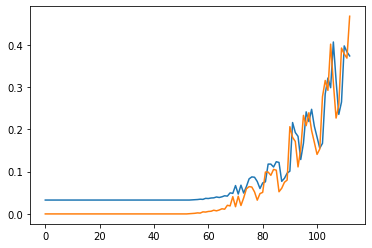

In [299]:
plt.plot(testPredict)
plt.plot(testY[0])
plt.show()

In [300]:
testY

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00048512, 0.00097023,
        0.00145535, 0.00242558, 0.00194047, 0.00485117, 0.00436605,
        0.0058214 , 0.00630652, 0.0087321 , 0.00727675, 0.00921722,
        0.01212792, 0.01115769, 0.02037491, 0.01891956, 0.04074982,
        0.01697909, 0.04172005, 0.01988979, 0.03

In [301]:
testPredict

array([[0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.03277081],
       [0.032